In [212]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from mpl_toolkits.mplot3d import Axes3D
import collections
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Q1
從 marketData 的資料中，取女性客戶的兩個欄位: Age、Spending Score 進行客戶分群，請使用 K-means 分群法，當 K = 2 時，請列出每 一群的中心點，例如C1中心點: Age=33.3、Spending Score=87.1。2 個中心點的列表請根據中心點的 Age 數值升冪排序。

In [244]:
market = pd.read_csv("./DM23_P2/data/marketData.csv")
display(market)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [245]:
market_f = market.loc[market['Gender'] == "Female"]
market_f = market_f.reset_index(drop=True)
market_f_cluster = market_f[['Age', 'Spending Score (1-100)']]
display(market_f_cluster)

,Age,Spending Score (1-100)
0,20,6
1,23,77
2,31,40
3,22,76
4,35,6
...,...,...
107,32,69
108,38,91
109,47,16
110,35,79


Get centers = random

In [249]:
k_means_random = cluster.KMeans(n_clusters=2, init='random', max_iter=30, random_state=99)
k_means_random.fit(market_f_cluster) 
center_random = k_means_random.cluster_centers_
center_random_df = pd.DataFrame(center_random, 
                                columns=market_f_cluster.columns).sort_values(by=['Age'], ascending=True)
display(center_random_df)

,Age,Spending Score (1-100)
1,29.077,78.179
0,42.918,37.288


In [250]:
random_cluster = pd.concat([market_f, pd.DataFrame(k_means_random.labels_, columns=["Labels"])], axis=1)
display(random_cluster)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,3,Female,20,16,6,0
1,4,Female,23,16,77,1
2,5,Female,31,17,40,0
3,6,Female,22,17,76,1
4,7,Female,35,18,6,0
...,...,...,...,...,...,...
107,192,Female,32,103,69,1
108,194,Female,38,113,91,1
109,195,Female,47,120,16,0
110,196,Female,35,120,79,1


Text(0, 0.5, 'Spending Score (1-100)')

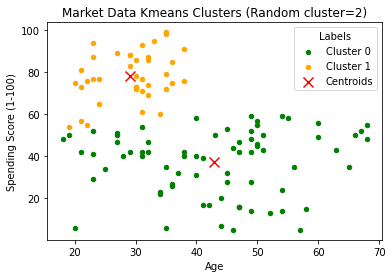

In [251]:
plt.scatter(random_cluster.loc[random_cluster['Labels'] == 0]["Age"],
            random_cluster.loc[random_cluster['Labels'] == 0]["Spending Score (1-100)"], 
            s=20, c='green', label ='Cluster 0')

plt.scatter(random_cluster.loc[random_cluster['Labels'] == 1]["Age"],
            random_cluster.loc[random_cluster['Labels'] == 1]["Spending Score (1-100)"], 
            s=20, c='orange', label ='Cluster 1')

plt.scatter(k_means_random.cluster_centers_[:, 0], k_means_random.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids', marker = 'x')
plt.legend(
    fontsize=10,
    title='Labels')


plt.title("Market Data Kmeans Clusters (Random cluster=2)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

Get center = Kmeans++

In [218]:
k_means_k = cluster.KMeans(n_clusters=2, init='k-means++', max_iter=30, random_state=99)
k_means_k.fit(market_f_cluster) 
center_k = k_means_k.cluster_centers_
center_k_df = pd.DataFrame(center_k, 
                           columns=market_f_cluster.columns).sort_values(by=['Age'], ascending=True)
display(center_k_df)

,Age,Spending Score (1-100)
1,29.077,78.179
0,42.918,37.288


In [219]:
kplus_cluster = pd.concat([market_f, pd.DataFrame(k_means_k.labels_, columns=["Labels"])], axis=1)
display(kplus_cluster)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,3,Female,20,16,6,0
1,4,Female,23,16,77,1
2,5,Female,31,17,40,0
3,6,Female,22,17,76,1
4,7,Female,35,18,6,0
...,...,...,...,...,...,...
107,192,Female,32,103,69,1
108,194,Female,38,113,91,1
109,195,Female,47,120,16,0
110,196,Female,35,120,79,1


Text(0, 0.5, 'Spending Score (1-100)')

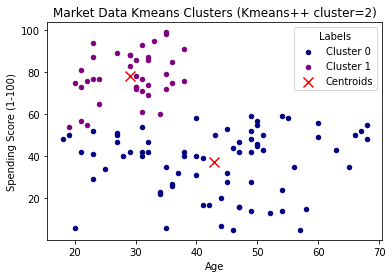

In [221]:
plt.scatter(kplus_cluster.loc[kplus_cluster['Labels'] == 0]["Age"],
            kplus_cluster.loc[kplus_cluster['Labels'] == 0]["Spending Score (1-100)"], 
            s=20, c='navy', label ='Cluster 0')

plt.scatter(kplus_cluster.loc[kplus_cluster['Labels'] == 1]["Age"],
            kplus_cluster.loc[kplus_cluster['Labels'] == 1]["Spending Score (1-100)"], 
            s=20, c='purple', label ='Cluster 1')

plt.scatter(k_means_k.cluster_centers_[:, 0], k_means_k.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids', marker = 'x')
plt.legend(
    fontsize=10,
    title='Labels')


plt.title("Market Data Kmeans Clusters (Kmeans++ cluster=2)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

### Q2
承第1題，請利用 Elbow 方法找出 K 應該設置多少?請提供參考圖如下圖一。

Get Center = Random

Text(0, 0.5, 'SSE')

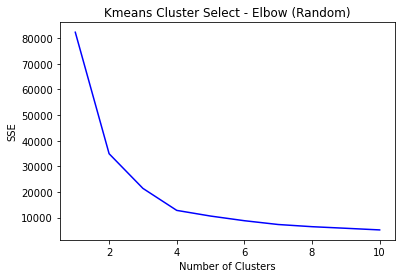

In [222]:
clusters = [num for num in range(1,11)]
SSE = []

for k in clusters:
    k_means = cluster.KMeans(n_clusters=k, init='random')
    k_means.fit(market_f_cluster)
    SSE.append(k_means.inertia_)

plt.plot(clusters, SSE, color = "blue")
plt.title('Kmeans Cluster Select - Elbow (Random)')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

The best num of cluster = 4

In [223]:
k_means_random = cluster.KMeans(n_clusters=4, init='random', max_iter=30, random_state=99)
k_means_random.fit(market_f_cluster) 
center_random = k_means_random.cluster_centers_
center_random_df = pd.DataFrame(center_random, columns=market_f_cluster.columns).sort_values(by=['Age'], ascending=True)
display(center_random_df)

,Age,Spending Score (1-100)
1,28.370,45.704
3,29.618,81.235
2,43.583,18.500
0,53.630,49.296


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,3,Female,20,16,6,2
1,4,Female,23,16,77,3
2,5,Female,31,17,40,1
3,6,Female,22,17,76,3
4,7,Female,35,18,6,2
...,...,...,...,...,...,...
107,192,Female,32,103,69,3
108,194,Female,38,113,91,3
109,195,Female,47,120,16,2
110,196,Female,35,120,79,3


Text(0, 0.5, 'Spending Score (1-100)')

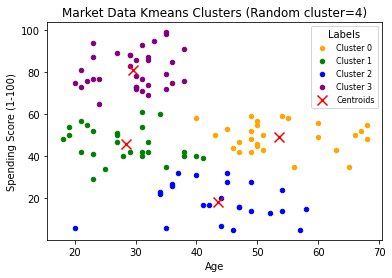

In [225]:
random_cluster = pd.concat([market_f, pd.DataFrame(k_means_random.labels_, columns=["Labels"])], axis=1)
display(random_cluster)

plt.scatter(random_cluster.loc[random_cluster['Labels'] == 0]["Age"],
            random_cluster.loc[random_cluster['Labels'] == 0]["Spending Score (1-100)"], 
            s=20, c='orange', label ='Cluster 0')

plt.scatter(random_cluster.loc[random_cluster['Labels'] == 1]["Age"],
            random_cluster.loc[random_cluster['Labels'] == 1]["Spending Score (1-100)"], 
            s=20, c='green', label ='Cluster 1')

plt.scatter(random_cluster.loc[random_cluster['Labels'] == 2]["Age"],
            random_cluster.loc[random_cluster['Labels'] == 2]["Spending Score (1-100)"], 
            s=20, c='blue', label ='Cluster 2')

plt.scatter(random_cluster.loc[random_cluster['Labels'] == 3]["Age"],
            random_cluster.loc[random_cluster['Labels'] == 3]["Spending Score (1-100)"], 
            s=20, c='purple', label ='Cluster 3')

plt.scatter(k_means_random.cluster_centers_[:, 0], k_means_random.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids', marker = 'x')
plt.legend(
    fontsize=8,
    title='Labels')


plt.title("Market Data Kmeans Clusters (Random cluster=4)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")


Get Cluster = Kmeans++

Text(0, 0.5, 'SSE')

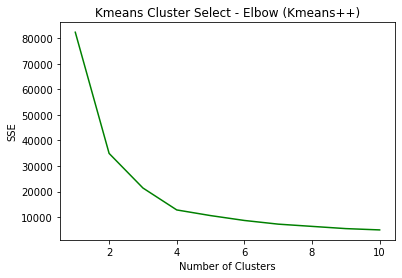

In [226]:
clusters = [num for num in range(1,11)]
SSE = []

for k in clusters:
    k_means = cluster.KMeans(n_clusters=k, init='k-means++')
    k_means.fit(market_f_cluster)
    SSE.append(k_means.inertia_)

plt.plot(clusters, SSE, color = "green")
plt.title('Kmeans Cluster Select - Elbow (Kmeans++)')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [227]:
k_means_k = cluster.KMeans(n_clusters=4, init='k-means++', max_iter=30, random_state=99)
k_means_k.fit(market_f_cluster) 
center_k = k_means_k.cluster_centers_
center_k_df = pd.DataFrame(center_k, columns=market_f_cluster.columns).sort_values(by=['Age'], ascending=True)
display(center_k_df)

,Age,Spending Score (1-100)
0,28.370,45.704
1,29.618,81.235
3,43.583,18.500
2,53.630,49.296


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,3,Female,20,16,6,3
1,4,Female,23,16,77,1
2,5,Female,31,17,40,0
3,6,Female,22,17,76,1
4,7,Female,35,18,6,3
...,...,...,...,...,...,...
107,192,Female,32,103,69,1
108,194,Female,38,113,91,1
109,195,Female,47,120,16,3
110,196,Female,35,120,79,1


Text(0, 0.5, 'Spending Score (1-100)')

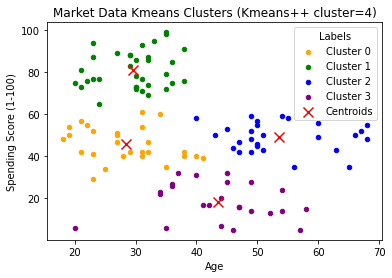

In [228]:
kplus_cluster = pd.concat([market_f, pd.DataFrame(k_means_k.labels_, columns=["Labels"])], axis=1)
display(kplus_cluster)

plt.scatter(kplus_cluster.loc[kplus_cluster['Labels'] == 0]["Age"],
            kplus_cluster.loc[kplus_cluster['Labels'] == 0]["Spending Score (1-100)"], 
            s=20, c='orange', label ='Cluster 0')

plt.scatter(kplus_cluster.loc[kplus_cluster['Labels'] == 1]["Age"],
            kplus_cluster.loc[kplus_cluster['Labels'] == 1]["Spending Score (1-100)"], 
            s=20, c='green', label ='Cluster 1')

plt.scatter(kplus_cluster.loc[kplus_cluster['Labels'] == 2]["Age"],
            kplus_cluster.loc[kplus_cluster['Labels'] == 2]["Spending Score (1-100)"], 
            s=20, c='blue', label ='Cluster 2')

plt.scatter(kplus_cluster.loc[kplus_cluster['Labels'] == 3]["Age"],
            kplus_cluster.loc[kplus_cluster['Labels'] == 3]["Spending Score (1-100)"], 
            s=20, c='purple', label ='Cluster 3')

plt.scatter(k_means_k.cluster_centers_[:, 0], k_means_k.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids', marker = 'x')
plt.legend(
    fontsize=10,
    title='Labels')


plt.title("Market Data Kmeans Clusters (Kmeans++ cluster=4)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

### Q3
從 marketData 的資料中，取所有客戶的三個欄位: Age、Annual Income、Spending Score 進行客戶分群，請使用 K-means 分群法，當 K = 3 時，請列出每一群的中心點，例如C1中心點: Age=33.3、 Annual Income=87.1、Spending Score=88.1。3 個中心點的列表請根 據中心點的 Age 數值升冪排序。

In [229]:
market_all = market[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
display(market_all)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [230]:
market_all_cluster = market_all.drop('CustomerID', axis=1)
display(market_all_cluster)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Get Centers = Random

In [231]:
k_means_random = cluster.KMeans(n_clusters=3, init='random', max_iter=30, random_state=99)
k_means_random.fit(market_all_cluster) 
center_random = k_means_random.cluster_centers_
center_random_df = pd.DataFrame(center_random, 
                                columns=market_all_cluster.columns).sort_values(by=['Age'], ascending=True)
display(center_random_df)

,Age,Annual Income (k$),Spending Score (1-100)
2,32.692,86.538,82.128
1,40.325,44.154,49.829
0,40.395,87.000,18.632


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1
...,...,...,...,...,...
195,196,35,120,79,2
196,197,45,126,28,0
197,198,32,126,74,2
198,199,32,137,18,0


Text(0.5, 0, 'Spending Score (1-100)')

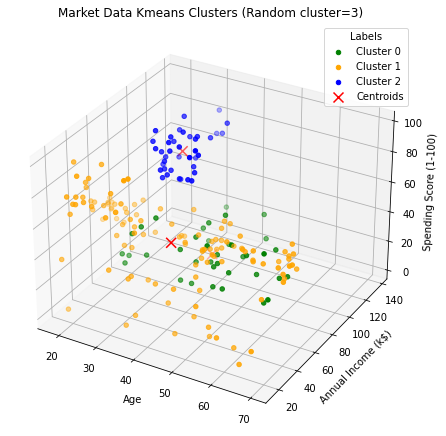

In [232]:
random_cluster = pd.concat([market_all, pd.DataFrame(k_means_random.labels_, columns=["Labels"])], axis=1)
display(random_cluster)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(random_cluster.loc[random_cluster['Labels'] == 0]["Age"],
           random_cluster.loc[random_cluster['Labels'] == 0]["Annual Income (k$)"],
           random_cluster.loc[random_cluster['Labels'] == 0]["Spending Score (1-100)"],
           s=20, c='green', label ='Cluster 0')

ax.scatter(random_cluster.loc[random_cluster['Labels'] == 1]["Age"],
           random_cluster.loc[random_cluster['Labels'] == 1]["Annual Income (k$)"],
           random_cluster.loc[random_cluster['Labels'] == 1]["Spending Score (1-100)"],
            s=20, c='orange', label ='Cluster 1')

ax.scatter(random_cluster.loc[random_cluster['Labels'] == 2]["Age"],
           random_cluster.loc[random_cluster['Labels'] == 2]["Annual Income (k$)"],
           random_cluster.loc[random_cluster['Labels'] == 2]["Spending Score (1-100)"],
            s=20, c='blue', label ='Cluster 2')

ax.scatter(k_means_random.cluster_centers_[:, 0], 
           k_means_random.cluster_centers_[:, 1], 
           k_means_random.cluster_centers_[:, 2],
           s=100, c='red', label = 'Centroids', marker = 'x')
ax.legend(
    fontsize=10,
    title='Labels')

plt.title("Market Data Kmeans Clusters (Random cluster=3)")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

Get Centers = Kmeans++

In [233]:
k_means_k = cluster.KMeans(n_clusters=3, init='k-means++', max_iter=30, random_state=99)
k_means_k.fit(market_all_cluster) 
center_k = k_means_k.cluster_centers_
center_k_df = pd.DataFrame(center_k, 
                           columns=market_all_cluster.columns).sort_values(by=['Age'], ascending=True)
display(center_k_df)

,Age,Annual Income (k$),Spending Score (1-100)
2,32.692,86.538,82.128
0,40.325,44.154,49.829
1,40.395,87.000,18.632


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,2
196,197,45,126,28,1
197,198,32,126,74,2
198,199,32,137,18,1


Text(0.5, 0, 'Spending Score (1-100)')

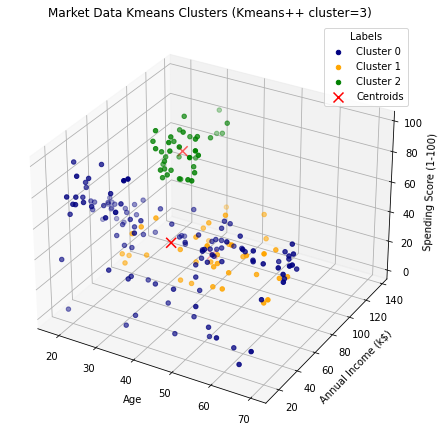

In [234]:
kplus_cluster = pd.concat([market_all, pd.DataFrame(k_means_k.labels_, columns=["Labels"])], axis=1)
display(kplus_cluster)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121, projection='3d')

ax.scatter(kplus_cluster.loc[kplus_cluster['Labels'] == 0]["Age"],
           kplus_cluster.loc[kplus_cluster['Labels'] == 0]["Annual Income (k$)"],
           kplus_cluster.loc[kplus_cluster['Labels'] == 0]["Spending Score (1-100)"],
            s=20, c='navy', label ='Cluster 0')

ax.scatter(kplus_cluster.loc[kplus_cluster['Labels'] == 1]["Age"],
           kplus_cluster.loc[kplus_cluster['Labels'] == 1]["Annual Income (k$)"],
           kplus_cluster.loc[kplus_cluster['Labels'] == 1]["Spending Score (1-100)"],
            s=20, c='orange', label ='Cluster 1')

ax.scatter(kplus_cluster.loc[kplus_cluster['Labels'] == 2]["Age"],
           kplus_cluster.loc[kplus_cluster['Labels'] == 2]["Annual Income (k$)"],
           kplus_cluster.loc[kplus_cluster['Labels'] == 2]["Spending Score (1-100)"],
            s=20, c='green', label ='Cluster 2')

ax.scatter(k_means_k.cluster_centers_[:, 0], 
           k_means_k.cluster_centers_[:, 1], 
           k_means_k.cluster_centers_[:, 2],
           s=100, c='red', label = 'Centroids', marker = 'x')

ax.legend(
    fontsize=10,
    title='Labels')


plt.title("Market Data Kmeans Clusters (Kmeans++ cluster=3)")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

### Q4
承第3題，請利用 Elbow 方法找出 K 應該設置多少?請提供參考圖如圖一。


Text(0, 0.5, 'SSE')

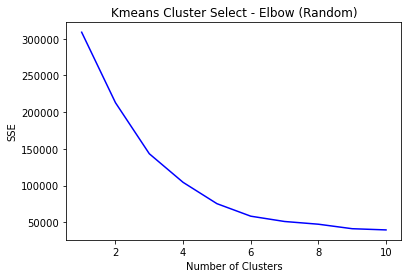

In [235]:
clusters = [num for num in range(1,11)]
SSE = []

for k in clusters:
    k_means = cluster.KMeans(n_clusters=k, init='random')
    k_means.fit(market_all_cluster)
    SSE.append(k_means.inertia_)

plt.plot(clusters, SSE, color = "blue")
plt.title('Kmeans Cluster Select - Elbow (Random)')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'SSE')

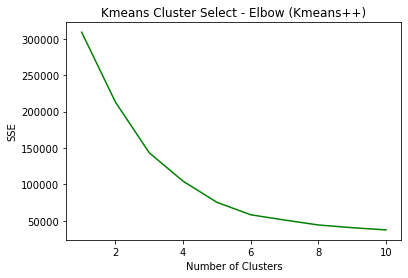

In [237]:
clusters = [num for num in range(1,11)]
SSE = []

for k in clusters:
    k_means = cluster.KMeans(n_clusters=k, init='k-means++')
    k_means.fit(market_all_cluster)
    SSE.append(k_means.inertia_)

plt.plot(clusters, SSE, color = "green")
plt.title('Kmeans Cluster Select - Elbow (Kmeans++)')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

### Q5
承第4題的K值設置，假設現在有一個行銷活動，請問你要怎麼透過 K-means 分群結果進行篩選，選擇一群目標客群，請列出此群的中心點，並解釋你的理由。

In [238]:
k_means_k = cluster.KMeans(n_clusters=3, init='k-means++', max_iter=30, random_state=99)
k_means_k.fit(market_all_cluster) 
center_k = k_means_k.cluster_centers_
center_k_df = pd.DataFrame(center_k, columns=market_all_cluster.columns)
display(center_k_df)

,Age,Annual Income (k$),Spending Score (1-100)
0,40.325,44.154,49.829
1,40.395,87.000,18.632
2,32.692,86.538,82.128


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,2
196,197,45,126,28,1
197,198,32,126,74,2
198,199,32,137,18,1


Text(0.5, 0, 'Spending Score (1-100)')

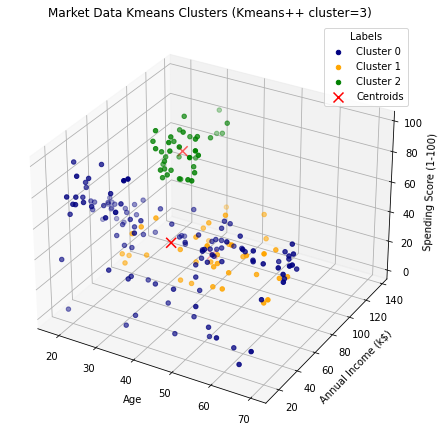

In [239]:
kplus_cluster = pd.concat([market_all, pd.DataFrame(k_means_k.labels_, columns=["Labels"])], axis=1)
display(kplus_cluster)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121, projection='3d')

ax.scatter(kplus_cluster.loc[kplus_cluster['Labels'] == 0]["Age"],
           kplus_cluster.loc[kplus_cluster['Labels'] == 0]["Annual Income (k$)"],
           kplus_cluster.loc[kplus_cluster['Labels'] == 0]["Spending Score (1-100)"],
            s=20, c='navy', label ='Cluster 0')

ax.scatter(kplus_cluster.loc[kplus_cluster['Labels'] == 1]["Age"],
           kplus_cluster.loc[kplus_cluster['Labels'] == 1]["Annual Income (k$)"],
           kplus_cluster.loc[kplus_cluster['Labels'] == 1]["Spending Score (1-100)"],
            s=20, c='orange', label ='Cluster 1')

ax.scatter(kplus_cluster.loc[kplus_cluster['Labels'] == 2]["Age"],
           kplus_cluster.loc[kplus_cluster['Labels'] == 2]["Annual Income (k$)"],
           kplus_cluster.loc[kplus_cluster['Labels'] == 2]["Spending Score (1-100)"],
            s=20, c='green', label ='Cluster 2')

ax.scatter(k_means_k.cluster_centers_[:, 0], 
           k_means_k.cluster_centers_[:, 1], 
           k_means_k.cluster_centers_[:, 2],
           s=100, c='red', label = 'Centroids', marker = 'x')

ax.legend(
    fontsize=10,
    title='Labels')


plt.title("Market Data Kmeans Clusters (Kmeans++ cluster=3)")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

In [240]:
# 每個類別的顧客數
print(collections.Counter(k_means_k.labels_))

Counter({0: 123, 2: 39, 1: 38})


In [241]:
select_cluster_0 = kplus_cluster.loc[kplus_cluster['Labels'] == 0]
select_cluster_0 = select_cluster_0.reset_index(drop=True)
display(select_cluster_0.head(5))

select_cluster_1 = kplus_cluster.loc[kplus_cluster['Labels'] == 1]
select_cluster_1 = select_cluster_1.reset_index(drop=True)
display(select_cluster_1.head(5))

select_cluster_2 = kplus_cluster.loc[kplus_cluster['Labels'] == 2]
select_cluster_2 = select_cluster_2.reset_index(drop=True)
display(select_cluster_2.head(5))

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Labels
0,125,23,70,29,1
1,127,43,71,35,1
2,129,59,71,11,1
3,131,47,71,9,1
4,133,25,72,34,1


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Labels
0,124,39,69,91,2
1,126,31,70,77,2
2,128,40,71,95,2
3,130,38,71,75,2
4,132,39,71,75,2


Cluster 0:


,Age,Annual Income (k$),Spending Score (1-100)
count,123.000,123.000,123.000
mean,40.325,44.154,49.829
std,16.114,16.038,19.694
min,18.000,15.000,3.000
25%,24.500,30.000,42.000
50%,38.000,46.000,50.000
75%,51.500,59.500,58.500
max,70.000,69.000,99.000


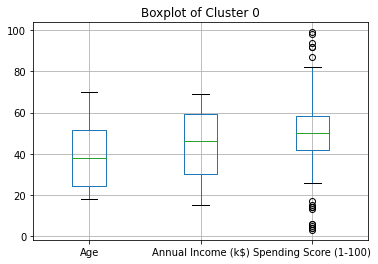

Cluster 1:


,Age,Annual Income (k$),Spending Score (1-100)
count,38.000,38.000,38.000
mean,40.395,87.000,18.632
std,11.377,16.271,10.916
min,19.000,70.000,1.000
25%,34.000,76.250,10.250
50%,41.500,80.000,16.500
75%,47.000,96.000,26.750
max,59.000,137.000,40.000


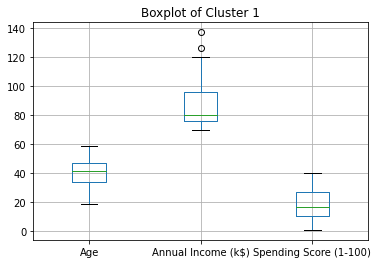

Cluster 2:


,Age,Annual Income (k$),Spending Score (1-100)
count,39.000,39.000,39.000
mean,32.692,86.538,82.128
std,3.729,16.312,9.364
min,27.000,69.000,63.000
25%,30.000,75.500,74.500
50%,32.000,79.000,83.000
75%,35.500,95.000,90.000
max,40.000,137.000,97.000


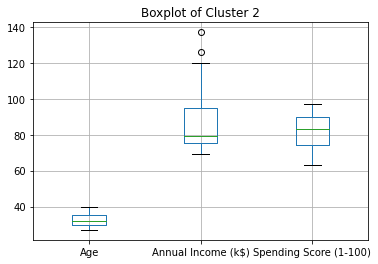

In [243]:
print("Cluster 0:")
cluster_0_des = select_cluster_0[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()
display(cluster_0_des)
select_cluster_0.boxplot(column=["Age", 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.title("Boxplot of Cluster 0")
plt.show()

print("Cluster 1:")
cluster_1_des = select_cluster_1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()
display(cluster_1_des)
select_cluster_1.boxplot(column=["Age", 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.title("Boxplot of Cluster 1")
plt.show()

print("Cluster 2:")
cluster_2_des = select_cluster_2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()
display(cluster_2_des)
select_cluster_2.boxplot(column=["Age", 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.title("Boxplot of Cluster 2")
plt.show()